In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

submissionFile = pd.read_csv("sample_submission.csv")

In [26]:
#Combine test and train into one file
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(95662, 17) (45019, 16) (140681, 17)


In [27]:
data.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,source
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,train
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,train
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,train
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,train
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,train


In [28]:
data['PricingStrategy'] = data['PricingStrategy'].astype('object')

In [5]:
data["Credit_Debit"] = data['Amount'].apply(lambda x: "Credit" if x<0 else "Debit")

In [29]:
#Drop the columns
data.drop(['CountryCode','CurrencyCode','BatchId','AccountId', 'Amount',
           'SubscriptionId','CustomerId','TransactionId','TransactionStartTime'],axis=1,inplace=True)

In [30]:
from feature_engine import categorical_encoders as ce

ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=None,
    variables=["ProviderId", "ProductCategory",  "ChannelId", "ProductId", "PricingStrategy"],# "Credit_Debit",
    drop_last=False)

ohe_enc.fit(data)
data = ohe_enc.transform(data)
ohe_enc.encoder_dict_

{'ProviderId': array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
        'ProviderId_3', 'ProviderId_2'], dtype=object),
 'ProductCategory': array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
        'tv', 'transport', 'ticket', 'movies', 'other', 'retail'],
       dtype=object),
 'ChannelId': array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5',
        'ChannelId_4'], dtype=object),
 'ProductId': array(['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21',
        'ProductId_3', 'ProductId_15', 'ProductId_11', 'ProductId_19',
        'ProductId_4', 'ProductId_5', 'ProductId_20', 'ProductId_9',
        'ProductId_24', 'ProductId_14', 'ProductId_2', 'ProductId_13',
        'ProductId_22', 'ProductId_8', 'ProductId_7', 'ProductId_27',
        'ProductId_12', 'ProductId_16', 'ProductId_23', 'ProductId_26',
        'ProductId_25', 'ProductId_18', 'ProductId_17'], dtype=object),
 'PricingStrategy': array([2, 4, 1, 0], dtype=obj

In [31]:
#Drop the columns
data.drop([
    "ProviderId_ProviderId_1", "ProductCategory_airtime",
    "ChannelId_ChannelId_3",  "ProductId_ProductId_1", #"Credit_Debit_Debit",
    "PricingStrategy_1"
],
          axis=1,
          inplace=True)

data.drop(['Amount'],axis=1,inplace=True)

In [32]:
data.head()

,FraudResult,Value,source,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_financial_services,ProductCategory_utility_bill,...,ProductId_ProductId_12,ProductId_ProductId_16,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,PricingStrategy_2,PricingStrategy_4,PricingStrategy_0
0,0.0,1000,train,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,20,train,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,500,train,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,21800,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.0,644,train,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [53]:
#Drop unnecessary columns:
labels = train.FraudResult

test.drop(['FraudResult','source'],axis=1,inplace=True)
train.drop(['FraudResult','source'],axis=1,inplace=True)


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
train.head()

,FraudResult,Value,source,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_financial_services,ProductCategory_utility_bill,...,ProductId_ProductId_12,ProductId_ProductId_16,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,PricingStrategy_2,PricingStrategy_4,PricingStrategy_0
0,0.0,1000,train,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,20,train,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,500,train,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,21800,train,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.0,644,train,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
test.head()

,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_financial_services,ProductCategory_utility_bill,ProductCategory_data_bundles,ProductCategory_tv,...,ProductId_ProductId_12,ProductId_ProductId_16,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,PricingStrategy_2,PricingStrategy_4,PricingStrategy_0
95662,1000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95663,2000,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95664,50,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95665,3000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
95666,60,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data.FraudResult.value_counts()

0.0    95469
1.0      193
Name: FraudResult, dtype: int64

In [121]:
from sklearn import preprocessing

# Get column names first
names = train.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
train = scaler.fit_transform(train)
train = pd.DataFrame(train, columns=names)

test = scaler.fit_transform(test)
test = pd.DataFrame(test, columns=names)

In [229]:
from sklearn import preprocessing

# Get column names first
names = train.columns

# Create the Scaler object
norm = preprocessing.Normalizer()

# Fit your data on the scaler object
train = norm.fit_transform(train)
train = pd.DataFrame(train, columns=names)

test = norm.fit_transform(test)
test = pd.DataFrame(test, columns=names)

In [17]:
train.shape

(95662, 49)

In [38]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.4, random_state = 0)  
X_train.shape, X_test.shape

((57397, 48), (38265, 48))

In [250]:
from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import SMOTE

smt = SMOTE(sampling_strategy='minority', k_neighbors=5, n_jobs=3)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [20]:
a=pd.DataFrame(y_train)

In [253]:
X_train = pd.DataFrame(X_train, columns=train.columns)

In [254]:
X_test

,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_financial_services,ProductCategory_utility_bill,ProductCategory_data_bundles,ProductCategory_tv,...,ProductId_ProductId_12,ProductId_ProductId_16,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,PricingStrategy_2,PricingStrategy_4,PricingStrategy_0
69075,1.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000500,0.0
65709,0.999999,0.000901,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000901,0.000000,0.0
5430,1.000000,0.000500,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.000000,0.0
82375,0.999998,0.000000,0.001000,0.000000,0.00000,0.0,0.001000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.000000,0.0
60896,0.999999,0.001000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.000000,0.0
6835,0.999990,0.000000,0.002016,0.000000,0.00000,0.0,0.002016,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002016,0.000000,0.0
7384,1.000000,0.000667,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000667,0.000000,0.0
71953,1.000000,0.000000,0.000000,0.000143,0.00000,0.0,0.000143,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000143,0.000000,0.0
5423,0.999999,0.001000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.000000,0.0
49255,0.999999,0.001000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001000,0.000000,0.0


In [40]:
# xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.01,subsample=0.55,n_estimators=200, seed=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1)#,scale_pos_weight=500)
#eval_set = [(X_train, y_train), (X_test, y_test)]
xg_cl.fit(X_train, y_train, verbose=True)#sample_weight=w_array,eval_metric=["error","logloss","auc"], eval_set=eval_set)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
preds = xg_cl.predict(X_test)

In [42]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, preds)))
print('Precision: {0:.5f}'.format(precision_score(y_test, preds)))
print('Recall: {0:.5f}'.format(recall_score(y_test, preds)))
print('F1: {0:.5f}'.format(f1_score(y_test, preds)))

print(classification_report(y_test, preds))

Accuracy: 0.99940
Precision: 0.90164
Recall: 0.76389
F1: 0.82707
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38193
         1.0       0.90      0.76      0.83        72

    accuracy                           1.00     38265
   macro avg       0.95      0.88      0.91     38265
weighted avg       1.00      1.00      1.00     38265



In [257]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, preds)))
print('Precision: {0:.5f}'.format(precision_score(y_test, preds)))
print('Recall: {0:.5f}'.format(recall_score(y_test, preds)))
print('F1: {0:.5f}'.format(f1_score(y_test, preds)))

Accuracy: 0.99830
Precision: 0.52713
Recall: 0.94444
F1: 0.67662


<Figure size 432x288 with 0 Axes>

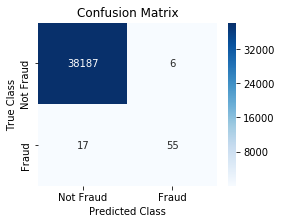

In [43]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, preds)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(4,3))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [44]:
prediction = xg_cl.predict(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission.csv', index=False)

In [259]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [266]:
rf = RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=1, oob_score=True, max_features=5,random_state=999)

rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))

0.9733483483483484


In [267]:
pred = rf.predict_proba(X_test)
#test_set_predictions = rf.predict_proba(x_test)

In [268]:
pred

array([[0.44668168, 0.55331832],
       [0.66453088, 0.33546912],
       [0.66453088, 0.33546912],
       ...,
       [0.69660883, 0.30339117],
       [0.6758573 , 0.3241427 ],
       [0.94595674, 0.05404326]])

In [269]:
predict = rf.predict(X_test)

In [270]:
predict

array([1., 0., 0., ..., 0., 0., 0.])

In [271]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, predict)))
print('Precision: {0:.5f}'.format(precision_score(y_test, predict)))
print('Recall: {0:.5f}'.format(recall_score(y_test, predict)))
print('F1: {0:.5f}'.format(f1_score(y_test, predict)))

print(classification_report(y_test, predict))

Accuracy: 0.95623
Precision: 0.03910
Recall: 0.94444
F1: 0.07510
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     38193
         1.0       0.04      0.94      0.08        72

    accuracy                           0.96     38265
   macro avg       0.52      0.95      0.53     38265
weighted avg       1.00      0.96      0.98     38265



In [181]:
prediction = rf.predict(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission2.csv', index=False)

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [46]:
clf = clf.fit(X_train, y_train)                                                             
prediction = clf.predict(X_test)                                         
print(prediction) 

[0. 0. 0. ... 0. 0. 0.]


In [47]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, preds)))
print('Precision: {0:.5f}'.format(precision_score(y_test, preds)))
print('Recall: {0:.5f}'.format(recall_score(y_test, preds)))
print('F1: {0:.5f}'.format(f1_score(y_test, preds)))

print(classification_report(y_test, preds))

Accuracy: 0.99940
Precision: 0.90164
Recall: 0.76389
F1: 0.82707
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38193
         1.0       0.90      0.76      0.83        72

    accuracy                           1.00     38265
   macro avg       0.95      0.88      0.91     38265
weighted avg       1.00      1.00      1.00     38265



<Figure size 432x288 with 0 Axes>

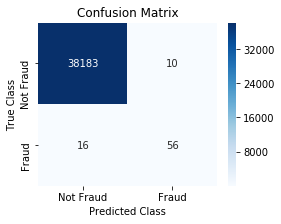

In [49]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, prediction)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(4,3))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [186]:
prediction = clf.predict(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission3.csv', index=False)

In [33]:
import catboost

In [46]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function='MultiClass')

In [47]:
for i in range(5):
    cb_model = CatBoostClassifier(iterations=420,
                              learning_rate=0.1,
                              depth=6,loss_function='MultiClass',#,scale_pos_weight=200,
                             l2_leaf_reg=10,
                             bootstrap_type='Bernoulli',
                              subsample=0.7,
                              #leaf_estimation_iterations=10,
                              metric_period=20,
                              #od_type='Iter',
                              #od_wait=45,
                              random_seed=42,
                              allow_writing_files=False)

In [48]:
cb_model.fit(X_train, y_train)

y_cb = cb_model.predict(X_test)

0:	learn: 0.5990004	total: 98ms	remaining: 41.1s
20:	learn: 0.0640783	total: 2.89s	remaining: 55s
40:	learn: 0.0104029	total: 5.69s	remaining: 52.6s
60:	learn: 0.0031960	total: 8.4s	remaining: 49.4s
80:	learn: 0.0021021	total: 11.1s	remaining: 46.5s
100:	learn: 0.0018283	total: 13.8s	remaining: 43.6s
120:	learn: 0.0016783	total: 16.6s	remaining: 41s
140:	learn: 0.0015889	total: 19.8s	remaining: 39.1s
160:	learn: 0.0015201	total: 23.1s	remaining: 37.1s
180:	learn: 0.0014756	total: 26.6s	remaining: 35.1s
200:	learn: 0.0014403	total: 29.7s	remaining: 32.3s
220:	learn: 0.0014097	total: 32.6s	remaining: 29.4s
240:	learn: 0.0013837	total: 35.7s	remaining: 26.5s
260:	learn: 0.0013631	total: 38.5s	remaining: 23.4s
280:	learn: 0.0013415	total: 41.1s	remaining: 20.4s
300:	learn: 0.0013261	total: 43.8s	remaining: 17.3s
320:	learn: 0.0013143	total: 46.8s	remaining: 14.4s
340:	learn: 0.0013022	total: 49.7s	remaining: 11.5s
360:	learn: 0.0012908	total: 52.8s	remaining: 8.63s
380:	learn: 0.0012794	to

In [53]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, y_cb)))
print('Precision: {0:.5f}'.format(precision_score(y_test, y_cb)))
print('Recall: {0:.5f}'.format(recall_score(y_test, y_cb)))
print('F1: {0:.5f}'.format(f1_score(y_test, y_cb)))

print(classification_report(y_test, y_cb))

Accuracy: 0.99895
Precision: 0.75000
Recall: 0.66667
F1: 0.70588
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38193
         1.0       0.75      0.67      0.71        72

    accuracy                           1.00     38265
   macro avg       0.87      0.83      0.85     38265
weighted avg       1.00      1.00      1.00     38265



<Figure size 432x288 with 0 Axes>

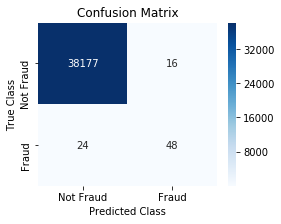

In [60]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, y_cb)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(4,3))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [91]:
prediction = cb_model.predict_proba(test)
prediction

array([[9.99977601e-01, 2.23987605e-05],
       [9.99975914e-01, 2.40855422e-05],
       [9.99979434e-01, 2.05661518e-05],
       ...,
       [9.99458880e-01, 5.41120346e-04],
       [9.99974859e-01, 2.51411973e-05],
       [9.99977575e-01, 2.24253490e-05]])

In [95]:
prediction = cb_model.predict_proba(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction[:,0], "FraudResult2":prediction[:, 1]
})

submission.to_csv('submission4.csv', index=False)

In [202]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    sampling_strategy='majority',
    replacement=False,
    random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)

In [203]:
print('Accuracy: {0:.5f}'.format(accuracy_score(y_test, preds)))
print('Precision: {0:.5f}'.format(precision_score(y_test, preds)))
print('Recall: {0:.5f}'.format(recall_score(y_test, preds)))
print('F1: {0:.5f}'.format(f1_score(y_test, preds)))

print(classification_report(y_test, preds))

Accuracy: 0.98503
Precision: 0.10675
Recall: 0.94444
F1: 0.19182
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     38193
         1.0       0.11      0.94      0.19        72

    accuracy                           0.99     38265
   macro avg       0.55      0.96      0.59     38265
weighted avg       1.00      0.99      0.99     38265



In [54]:
sample_data = train.sample(frac=0.03, replace=True)
y = sample_data['FraudResult']
X = sample_data.drop(['FraudResult'], axis=1)
X.shape, y.shape

((2870, 48), (2870,))

In [55]:
#Searching for the best parameter using GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
gsCV_model = RandomForestRegressor(oob_score=True)

tuned_parameters = {
    'n_estimators': [200],
    'max_features': [2, 4, 8, 10, 'auto'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3,4]
}

gsCV = GridSearchCV(gsCV_model, tuned_parameters, n_jobs=-1, verbose=1)
gsCV.fit(X, y)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.7min finished
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
  

In [56]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.5341747300782546
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from collections import OrderedDict
from sklearn.datasets import make_classification
ensemble_clfs = [(
    "RandomForestRegressor, max_depth='10', min_samples_split='3', min_samples_leaf=2",
    RandomForestRegressor(
        warm_start=True,
        max_features=4,
        max_depth=20,
        min_samples_split=3,
        min_samples_leaf=1,
        oob_score=True))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 30
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 50):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

In [ ]:
# Generating "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

In [ ]:
y = train['bank_account']
X = train.drop(['bank_account'], axis=1)

#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
model = RandomForestRegressor(
    max_features=4,
    max_depth=20,
    min_samples_leaf=1,
    oob_score=True,
    min_samples_split=3,
    n_estimators=500,
    n_jobs=-1)

model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)